Assignment 3 (due on 11/22)

Student：唐正道（12331306），Gtihub：tzd19

批改人：赵淑慧

得分：51/60

# PS1. Niño 3.4 index
20/20  
1. Niño 3.4范围正确，计算月度气候态（多年平均每月）的SST，并获取SST距平。10/10
2. 根据厄尔尼诺和拉尼娜事件定义，模仿例图（x轴月尺度时间，y轴温度距平，黑线表示三个月滑动平均的距平值，红柱表示正距平，蓝柱表示负距平，有两种事件的阈值水平线）进行绘图。10/10

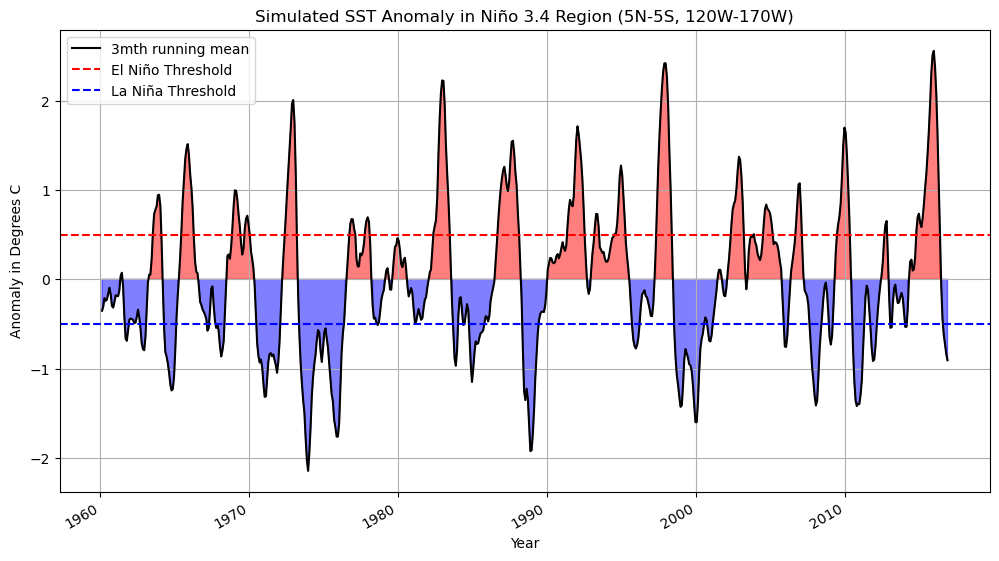

In [2]:
#第一题
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
da = xr.open_dataset(r"C:\Program1\jupyter_notebook\ese5023\NOAA_NCDC_ERSST_v3b_SST.nc", engine="netcdf4")
region = dict(lat=slice(-5, 5), lon=slice(190, 240))
nino34_sst = da.sst.sel(**region)
monthly_climatology = nino34_sst.groupby('time.month').mean('time')
sst_anomalies = nino34_sst.groupby('time.month') - monthly_climatology
running_mean_anomalies = sst_anomalies.rolling(time=3, center=True).mean()
nino34_index = running_mean_anomalies.mean(dim=['lat','lon'])
time = nino34_index.time
plt.figure(figsize=(12, 6))
nino34_index.plot(label='3mth running mean', color='black')
plt.fill_between(time, nino34_index, where=(nino34_index > 0), color='red', alpha=0.5)
plt.fill_between(time, nino34_index, where=(nino34_index < 0), color='blue', alpha=0.5)
plt.axhline(0.5, color='red', linestyle='--', label='El Niño Threshold')
plt.axhline(-0.5, color='blue', linestyle='--', label='La Niña Threshold')
plt.title("Simulated SST Anomaly in Niño 3.4 Region (5N-5S, 120W-170W)")
plt.xlabel("Year")
plt.ylabel("Anomaly in Degrees C")
plt.legend()
plt.grid(True)
plt.show()

# PS2. Earth’s energy budget
23/30  
1. 绘制按时间平均的全天况下的TOA长波、短波、太阳辐射的2D图，将三者加和并可视化确认他们的和与TOA净通量相等。——题目表述有误，toa_net=solar_rad-longwave-shortwave；缺少变量单位。3/5
2. 计算并确认TOA入射太阳辐射、出射长波、出射短波与示例图中的信息相符合，注意计算每个格网的实际面积。——计算出格网面积后没有换算成权重，且需要按时间平均，得到的结果应与题中图片上的值接近。见修正代码；表述需加上变量的单位。8/10
3. 计算并绘制每1度纬度带上的净辐射总量，注意正确的单位。——辐射总量单位应为W。4/5
4. 计算并绘制低云区和高云区的按时间平均的出射短波和长波辐射的2D合成图。注意低云区和高云区的定义。——图中缺少变量单位。4/5
5. 计算在高云区和低云区合成的短波和长波辐射的总体平均值，并回答云层对短波和长波辐射的总体影响是怎样的？——应按面积权重计算总体平均值；应根据数据回答问题。4/5

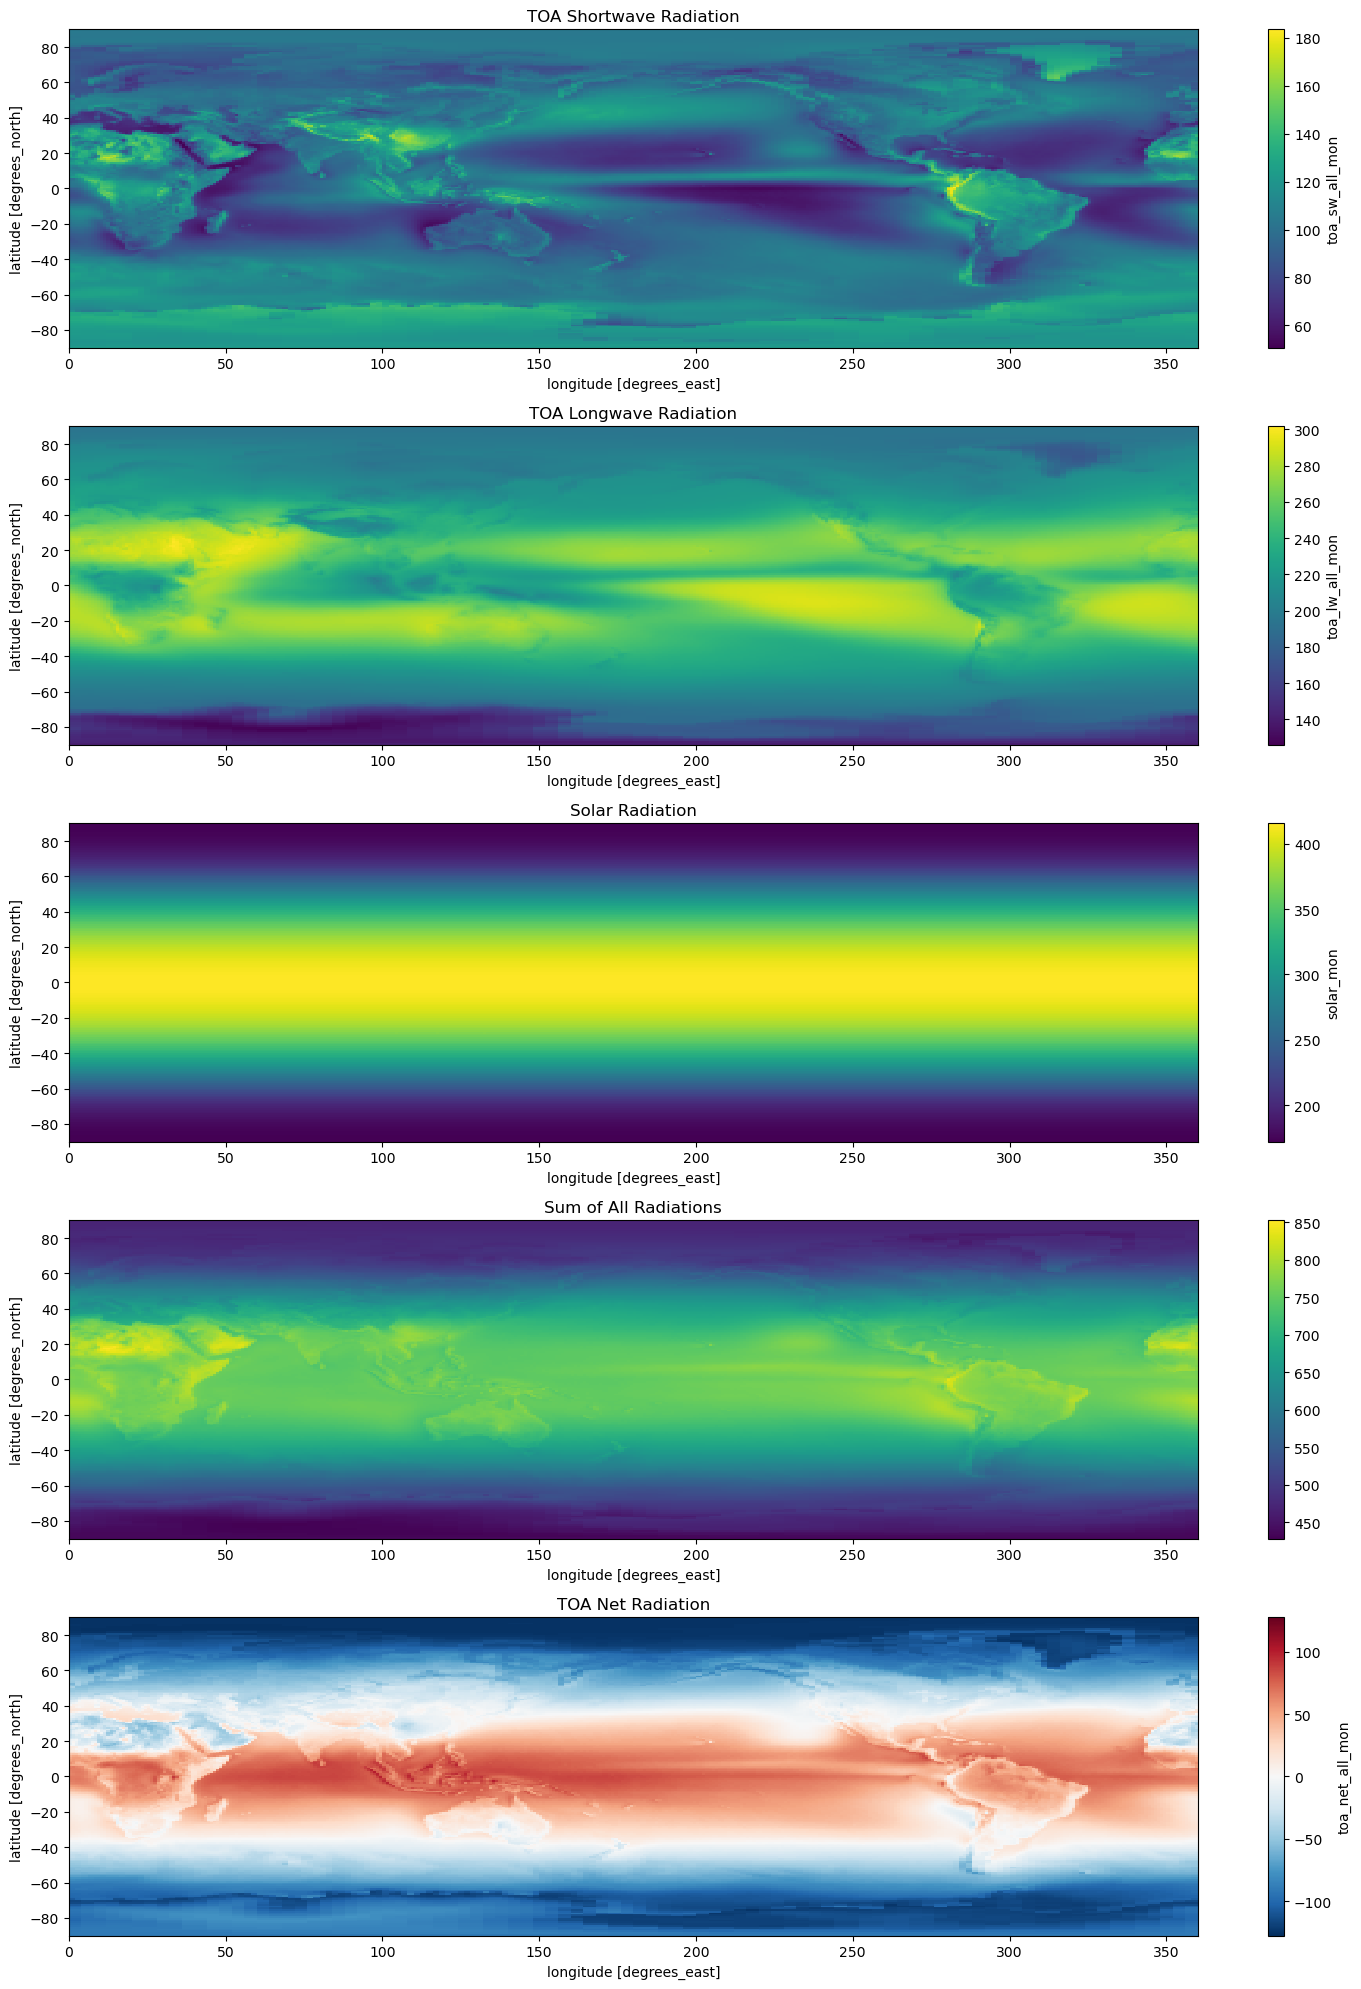

In [3]:
#第二题
#2.1
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

da = xr.open_dataset(r"C:\Program1\jupyter_notebook\ese5023\CERES_EBAF-TOA_200003-201701.nc", engine="netcdf4")

fig, axs = plt.subplots(5, 1, figsize=(15, 20))

da1=da['toa_sw_all_mon'].mean(dim='time')
da2=da['toa_lw_all_mon'].mean(dim='time')
da3=da['solar_mon'].mean(dim='time')
da4=da1+da2+da3
da5=da['toa_net_all_mon'].mean(dim='time')

da1.plot(ax=axs[0])
da2.plot(ax=axs[1])
da3.plot(ax=axs[2])
da4.plot(ax=axs[3])
da5.plot(ax=axs[4])

axs[0].set_title('TOA Shortwave Radiation')
axs[1].set_title('TOA Longwave Radiation')
axs[2].set_title('Solar Radiation')
axs[3].set_title('Sum of All Radiations')
axs[4].set_title('TOA Net Radiation')

plt.tight_layout()
plt.show()

In [14]:
#2.2
toa_solar_in = da['solar_mon']
toa_lw_out = da['toa_lw_all_mon']
toa_sw_out = da['toa_sw_all_mon']
earth_radius = 6371 * 1000  
lat = da['lat']
lon = da['lon']
lat_rad = np.deg2rad(lat.values)  

grid_area = 2 * np.pi * earth_radius**2 * np.abs(np.sin(lat_rad[1:]) - np.sin(lat_rad[:-1])) / len(lon)

if len(lat) == len(grid_area) + 1:
    grid_area = np.concatenate([grid_area, [grid_area[-1]]])

grid_area_repeated = np.tile(grid_area, (len(lon), 1)).T

grid_area_xr = xr.DataArray(grid_area_repeated, dims=["lat", "lon"])

avg_toa_solar_in = (da['solar_mon'] * grid_area_xr).mean(dim=["lat", "lon"])

# TA corrected
avg_toa_solar_in = (da['solar_mon'] * grid_area_xr/grid_area_xr.sum()).mean(dim='time').sum(dim=["lat", "lon"]) 
# avg_toa_solar_in is 340.2588 which matches up with the cartoon.

avg_toa_lw_out = (da['toa_lw_all_mon'] * grid_area_xr).mean(dim=["lat", "lon"])
avg_toa_sw_out = (da['toa_sw_all_mon'] * grid_area_xr).mean(dim=["lat", "lon"])

print("Average TOA Incoming Solar:", avg_toa_solar_in.values)
print("Average TOA Outgoing Longwave:", avg_toa_lw_out.values)
print("Average TOA Outgoing Shortwave:", avg_toa_sw_out.values)


Average TOA Incoming Solar: 340.2588
Average TOA Outgoing Longwave: [1.8749819e+12 1.8731676e+12 1.8951976e+12 1.9140556e+12 1.9192191e+12
 1.9168534e+12 1.9062712e+12 1.8798429e+12 1.8665362e+12 1.8654292e+12
 1.8657249e+12 1.8642318e+12 1.8657039e+12 1.8759141e+12 1.8976640e+12
 1.9078531e+12 1.9216572e+12 1.9249872e+12 1.9041802e+12 1.8856386e+12
 1.8753851e+12 1.8669522e+12 1.8669746e+12 1.8734422e+12 1.8724959e+12
 1.8840747e+12 1.9032223e+12 1.9141055e+12 1.9261618e+12 1.9237584e+12
 1.9131862e+12 1.8892722e+12 1.8729703e+12 1.8657378e+12 1.8741277e+12
 1.8750109e+12 1.8809797e+12 1.8813400e+12 1.8959041e+12 1.9132235e+12
 1.9241662e+12 1.9211998e+12 1.9104115e+12 1.8948341e+12 1.8753575e+12
 1.8717567e+12 1.8662866e+12 1.8749269e+12 1.8738361e+12 1.8801932e+12
 1.8933424e+12 1.9137820e+12 1.9172791e+12 1.9220415e+12 1.9079376e+12
 1.8932525e+12 1.8727540e+12 1.8639604e+12 1.8710476e+12 1.8763334e+12
 1.8745515e+12 1.8827712e+12 1.8882095e+12 1.9121481e+12 1.9252429e+12
 1.923236

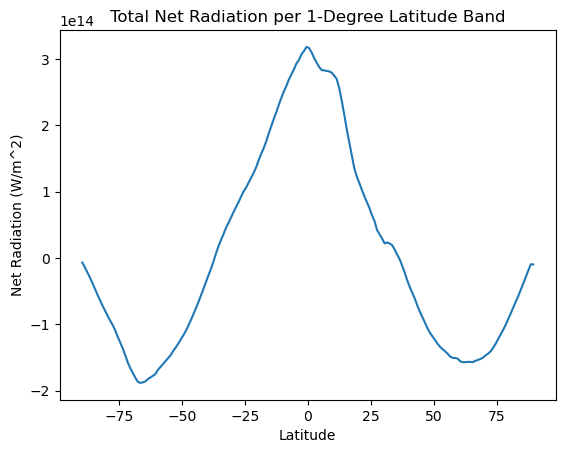

In [15]:
#2.3
net_radiation = da['solar_mon'] - (da['toa_lw_all_mon'] + da['toa_sw_all_mon'])
earth_radius = 6371 * 1000
lat = da['lat']
lon = da['lon']
lat_rad = np.deg2rad(lat.values)
delta_lat = np.abs(lat_rad[1:] - lat_rad[:-1])  
grid_area = 2 * np.pi * earth_radius**2 * np.abs(np.sin(lat_rad[1:]) - np.sin(lat_rad[:-1])) / len(lon)
if len(lat) == len(grid_area) + 1:
    grid_area = np.concatenate([grid_area, [grid_area[-1]]])
grid_area_repeated = np.tile(grid_area, (len(lon), 1)).T
grid_area_xr = xr.DataArray(grid_area_repeated, dims=["lat", "lon"])
net_radiation_area_weighted = net_radiation * grid_area_xr
net_radiation_lat_band = net_radiation_area_weighted.sum(dim='lon')

net_radiation_lat_band.mean(dim='time').plot()
plt.title('Total Net Radiation per 1-Degree Latitude Band')
plt.xlabel('Latitude')
plt.ylabel('Net Radiation (W/m^2)')
plt.show()


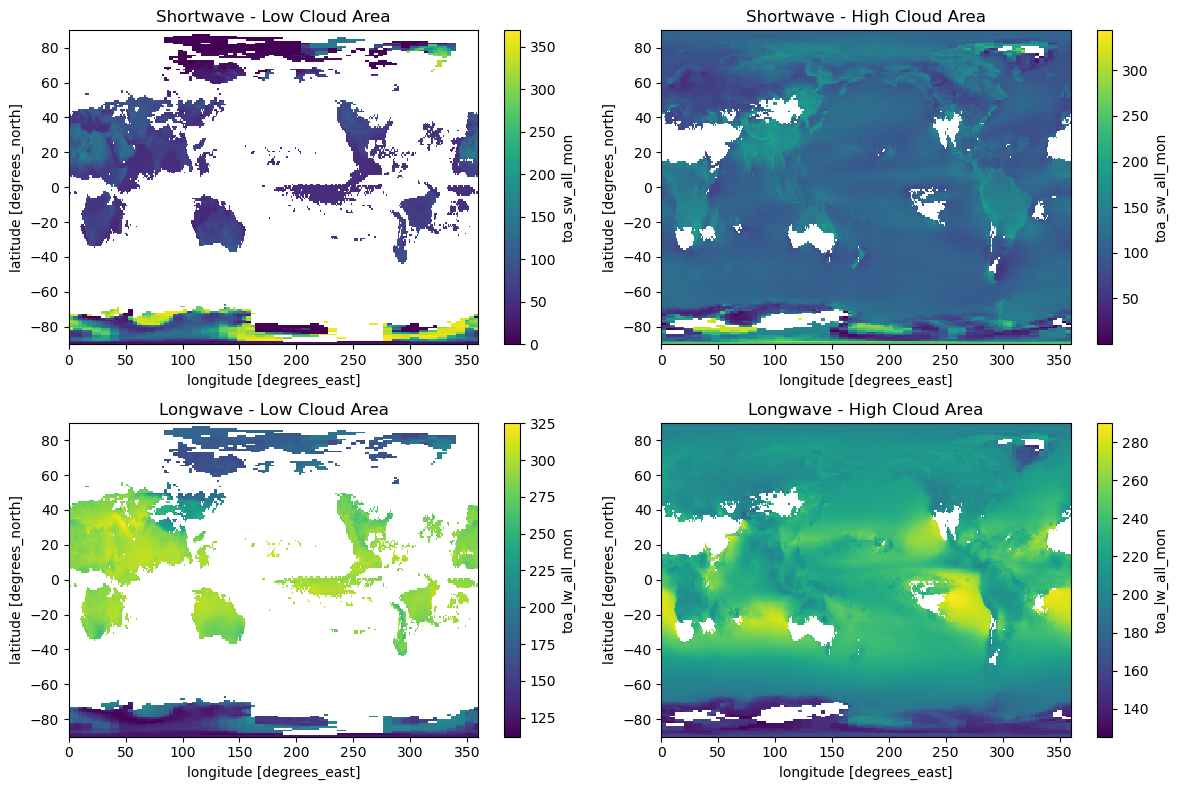

In [16]:
#2.4
cloud_cover = da['cldarea_total_daynight_mon']  
toa_sw_out = da['toa_sw_all_mon']  
toa_lw_out = da['toa_lw_all_mon'] 
low_cloud = cloud_cover <= 25
high_cloud = cloud_cover >= 75

sw_low_cloud_mean = toa_sw_out.where(low_cloud).mean(dim='time')
sw_high_cloud_mean = toa_sw_out.where(high_cloud).mean(dim='time')
lw_low_cloud_mean = toa_lw_out.where(low_cloud).mean(dim='time')
lw_high_cloud_mean = toa_lw_out.where(high_cloud).mean(dim='time')

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

sw_low_cloud_mean.plot(ax=axs[0, 0])
axs[0, 0].set_title('Shortwave - Low Cloud Area')

sw_high_cloud_mean.plot(ax=axs[0, 1])
axs[0, 1].set_title('Shortwave - High Cloud Area')

lw_low_cloud_mean.plot(ax=axs[1, 0])
axs[1, 0].set_title('Longwave - Low Cloud Area')

lw_high_cloud_mean.plot(ax=axs[1, 1])
axs[1, 1].set_title('Longwave - High Cloud Area')

plt.tight_layout()
plt.show()


In [17]:
#2.5
cloud_cover = da['cldarea_total_daynight_mon']
toa_sw_out = da['toa_sw_all_mon'] 
toa_lw_out = da['toa_lw_all_mon'] 

low_cloud = cloud_cover <= 25
high_cloud = cloud_cover >= 75

global_mean_sw_low_cloud = toa_sw_out.where(low_cloud).mean()
global_mean_sw_high_cloud = toa_sw_out.where(high_cloud).mean()
global_mean_lw_low_cloud = toa_lw_out.where(low_cloud).mean()
global_mean_lw_high_cloud = toa_lw_out.where(high_cloud).mean()

print("Global Mean Shortwave Radiation - Low Cloud Area:", global_mean_sw_low_cloud.values)
print("Global Mean Shortwave Radiation - High Cloud Area:", global_mean_sw_high_cloud.values)
print("Global Mean Longwave Radiation - Low Cloud Area:", global_mean_lw_low_cloud.values)
print("Global Mean Longwave Radiation - High Cloud Area:", global_mean_lw_high_cloud.values)


Global Mean Shortwave Radiation - Low Cloud Area: 97.11116
Global Mean Shortwave Radiation - High Cloud Area: 111.76594
Global Mean Longwave Radiation - Low Cloud Area: 247.33109
Global Mean Longwave Radiation - High Cloud Area: 215.39049


# PS3. Explore a netCDF dataset
8/10  
1. 绘制某个变量的时间序列，注意去掉月尺度的季节性周期。——图名表述不清，变量单位缺失。4/5
2. 用该数据集绘制至少5种不同的图。——图名表述不清，变量单位缺失，横纵坐标/图名的排版存在问题。4/5

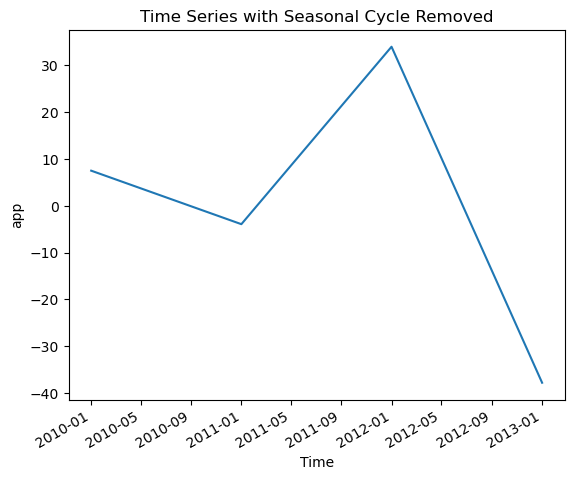

In [18]:
#第三题
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
da = xr.open_dataset("CMS_Lake_Superior_PP_Yearly_2010-2013.nc", engine="netcdf4",drop_variables="time_bounds")
monthly_mean = da['app'].groupby('time.month').mean()
app_deseasonalized = da['app'].groupby('time.month') - monthly_mean
app_index = app_deseasonalized.mean(dim=['latitude','longitude'])
app_index.plot()
plt.title('Time Series with Seasonal Cycle Removed')
plt.xlabel('Time')
plt.ylabel('app')
plt.show()

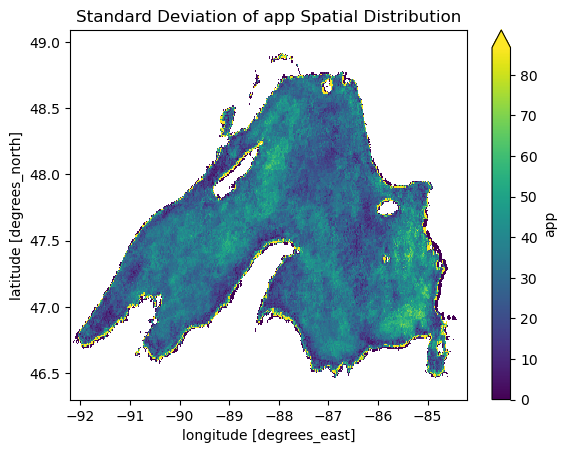

In [19]:
#经纬度标准差热图
da['app'].std(dim='time').plot(x='longitude', y='latitude', robust=True)
plt.title('Standard Deviation of app Spatial Distribution')
plt.show()

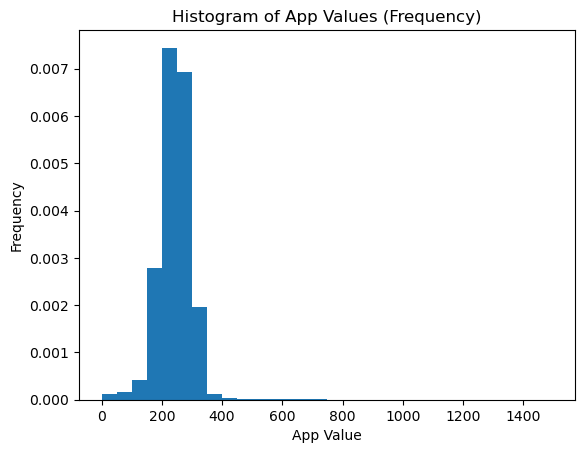

In [20]:
#直方图
app = da['app']
app_flat = app.values.flatten()
plt.hist(app_flat, bins=30, density=True)
plt.title('Histogram of App Values (Frequency)')
plt.xlabel('App Value')
plt.ylabel('Frequency')
plt.show()

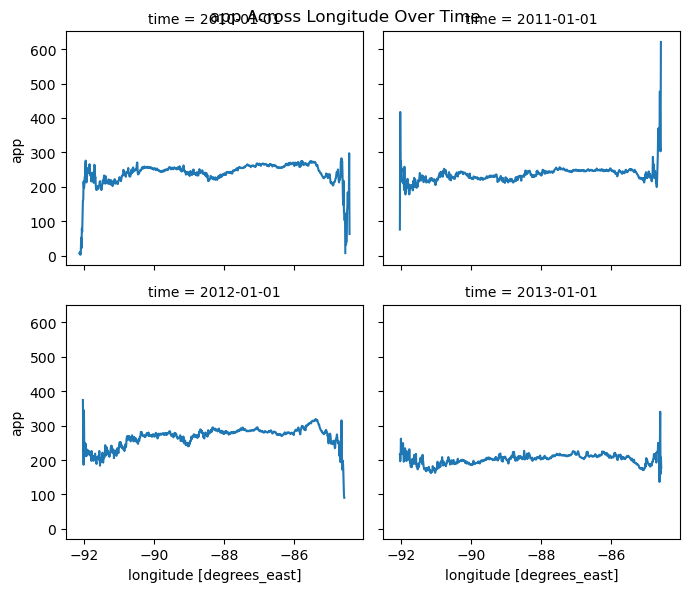

In [21]:
#经度-时间图：
app.mean(dim='latitude').plot(x='longitude', col='time', col_wrap=2)
plt.suptitle('app Across Longitude Over Time')
plt.show()

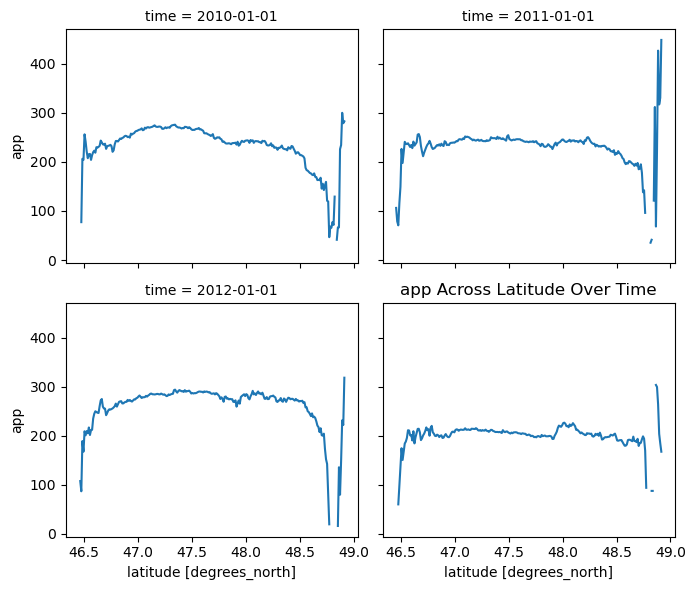

In [22]:
#纬度-时间图
app.mean(dim='longitude').plot(x='latitude', col='time', col_wrap=2)
plt.title('app Across Latitude Over Time')
plt.show()

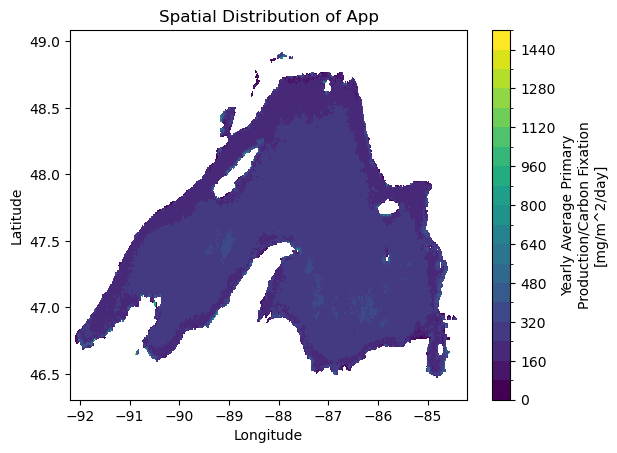

In [23]:
#经纬度热图
app.isel(time=0).plot.contourf(x='longitude', y='latitude', levels=20)
plt.title('Spatial Distribution of App')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()